In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
path = '/Users/mawongh/OneDrive/REFERENCE FILE/D/Disertation/brainstorming/'
df = pd.read_csv(path + 'linear_model_comparison.csv')
df2 = pd.melt(df, id_vars=['algorithm', 'sample_size'], value_name='mse')
# comp_2['datasample_sz'] = [lambda x:x.split('.')[0] for x in comp_2.variable]
df2['datasample_sz'] = [val.split(' ')[1] for val in df2['variable'].values]
df2['data'] = [val.split(' ')[0] for val in df2['sample_size'].values]
df2.head()

,algorithm,sample_size,variable,mse,datasample_sz,data
0,baseline 1,Train MSE,75K,9.180,75K,Train
1,baseline 1,Test MSE,75K,6.670,75K,Test
2,baseline 2,Train MSE,75K,9.040,75K,Train
3,baseline 2,Test MSE,75K,6.570,75K,Test
4,linear model,Train MSE,75K,4.795,75K,Train


In [39]:
df_orig = df2[['algorithm','mse','datasample_sz','data']]
df_orig.head()

,algorithm,mse,datasample_sz,data
0,baseline 1,9.180,75K,Train
1,baseline 1,6.670,75K,Test
2,baseline 2,9.040,75K,Train
3,baseline 2,6.570,75K,Test
4,linear model,4.795,75K,Train


In [18]:
df = pd.read_csv(path + 'results.csv')
numbers = (df.sample_size / 1000).astype(int).astype(str)
Ks = np.repeat('K', len(numbers))
df['datasample_sz'] = numbers + Ks
df.head()


,algorithm,sample_size,mse,data,datasample_sz
0,baseline 1,75000,9.477242,train,75K
1,baseline 1,75000,8.401945,test,75K
2,baseline 2,75000,9.341001,train,75K
3,baseline 2,75000,8.287177,test,75K
4,linear model,75000,5.144229,train,75K


In [44]:
df['data2'] = [df.data[i].title() for i in np.arange(len(df))]
df_other = df[['algorithm', 'mse','datasample_sz','data2']]
df_other.columns = ['algorithm', 'mse','datasample_sz','data']
len(df_other)

72

In [43]:
df2 = df_orig.append(df_other)
len(df2)

144

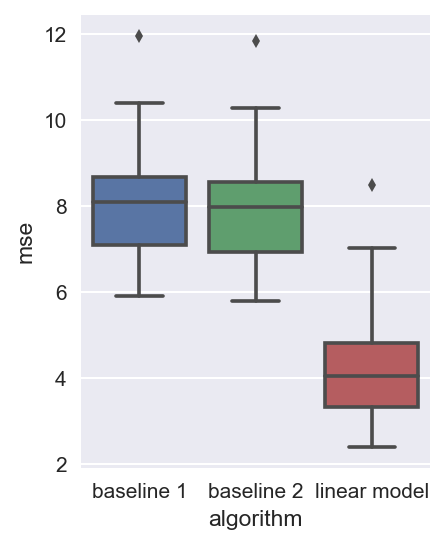

In [53]:
plt.figure(figsize=(3,4), dpi=150)
sns.boxplot(x="algorithm", y="mse", data=df2)
plt.show()

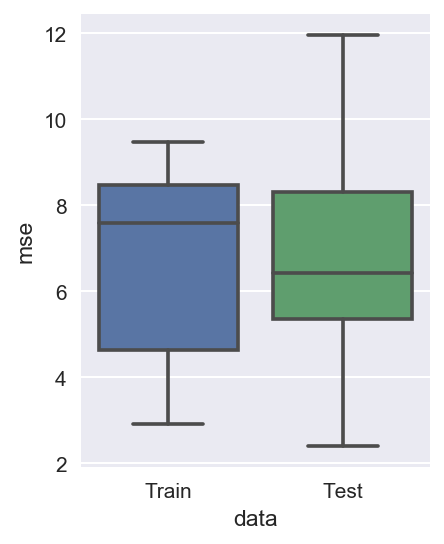

In [54]:
plt.figure(figsize=(3,4), dpi=150)
sns.boxplot(x="data", y="mse", data=df2)
plt.show()

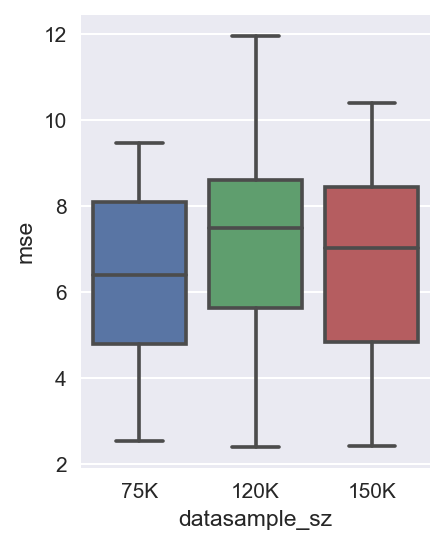

In [55]:
plt.figure(figsize=(3,4), dpi=150)
sns.boxplot(x="datasample_sz", y="mse", data=df2)
plt.show()